In [1]:
#installing kaggle and directing the Dataset from Kaggle. 
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

Saving kaggle.json to kaggle.json
 98% 83.0M/84.7M [00:01<00:00, 90.5MB/s]
100% 84.7M/84.7M [00:01<00:00, 79.4MB/s]


In [2]:
from zipfile import ZipFile
file_name= 'climate-change-earth-surface-temperature-data.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


Installing the libraries

In [6]:
from tensorflow.keras import layers, Model, backend as K
from tensorflow.keras import backend as K 
from tensorflow.keras.layers import Layer
import tensorflow as tf

from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential
import keras

from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# from kerashypetune import KerasGridSearch


In [7]:
# !pip install statsmodels

In [8]:
# from pandas import read_csv
# from pandas import datetime
# from matplotlib import pyplot

# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt

In [9]:
# from statsmodels.tsa.arima_model import ARIMA

['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'São Paulo' 'Saint Petersburg'
 'Salvador' 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang'
 'Singapore' 'Surabaya' 'Surat' 'Sydney' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

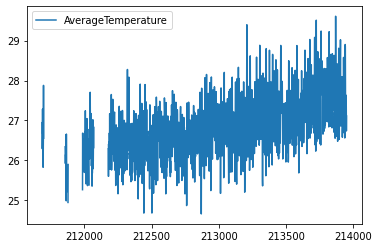

In [10]:
data = pd.read_csv("/content/GlobalLandTemperaturesByMajorCity.csv")
data.head()

hmm = data['City'].values.ravel()
cariunik = pd.unique(hmm)
print(cariunik)
data = data[data['City']=='Surabaya']
data.head()

data[['AverageTemperature']].plot() 
plt.show()


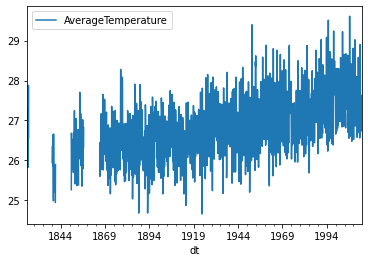

In [11]:
data['dt'] = pd.to_datetime(data['dt'])
#data[] = pd.to_datetime('13000101', format='%Y%m%d'
data = data.set_index('dt')
data.head(30)

data[['AverageTemperature']].plot()
plt.show()

In [12]:
date_split = '1869-01-01'
data = data[date_split:]
data.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1869-01-01,26.261,1.581,Surabaya,Indonesia,7.23S,112.70E
1869-02-01,26.795,1.515,Surabaya,Indonesia,7.23S,112.70E
1869-03-01,26.581,1.281,Surabaya,Indonesia,7.23S,112.70E
1869-04-01,26.384,1.268,Surabaya,Indonesia,7.23S,112.70E
1869-05-01,26.632,0.911,Surabaya,Indonesia,7.23S,112.70E


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1737 entries, 1869-01-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             1737 non-null   float64
 1   AverageTemperatureUncertainty  1737 non-null   float64
 2   City                           1737 non-null   object 
 3   Country                        1737 non-null   object 
 4   Latitude                       1737 non-null   object 
 5   Longitude                      1737 non-null   object 
dtypes: float64(2), object(4)
memory usage: 95.0+ KB
None
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


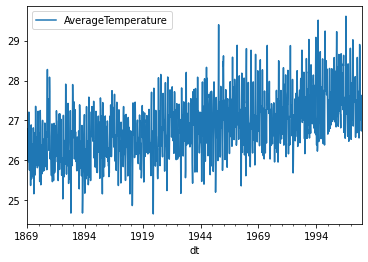

In [13]:
data_inter = data.interpolate()
print(data_inter.info())
print(data_inter.isna().sum())

data_inter[['AverageTemperature']].plot()
plt.show()

(1737,)
[[0.32329155]
 [0.43125758]
 [0.3879903 ]
 ...
 [0.41973312]
 [0.49555196]
 [0.49555196]]
[[0.32329155 0.43125758 0.3879903  ... 0.41973312 0.49555196 0.49555196]]


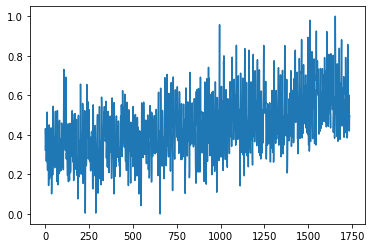

In [14]:
data = data_inter['AverageTemperature'].values
#data = data.reshape(1, -1)
print(data.shape)


data = data.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
print(scaled_data)
scaled_data_series = scaled_data.reshape(1,-1)
print(scaled_data_series)

plt.plot(scaled_data)
plt.show()

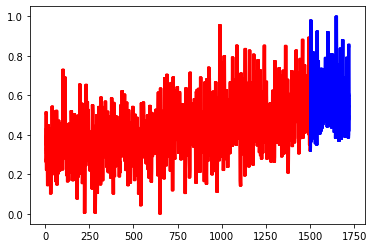

In [15]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


raw_seq = scaled_data_series[0]

# choose a number of time steps
n_steps = 12

# split into samples
X, y = split_sequence(raw_seq, n_steps)

train_data = X[:1500]
test_data = X[1500:]

train_y = y[:1500]
test_y = y[1500:]

y1 = np.arange(1,train_data.shape[0]+1)
y2 = np.arange(train_data.shape[0],train_data.shape[0]+test_data.shape[0])

plt.plot(y1, train_data, 'r', y2, test_data, 'b')
plt.show()

In [26]:
X_train = train_data

X_test = test_data 

y_train = train_y
y_test = test_y 


In [16]:
n_features = 1
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], n_features)
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], n_features)

In [17]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(train_data, train_y, epochs=30, batch_size=2, verbose=2)

Epoch 1/30
750/750 - 3s - loss: 0.0187 - 3s/epoch - 4ms/step
Epoch 2/30
750/750 - 2s - loss: 0.0111 - 2s/epoch - 2ms/step
Epoch 3/30
750/750 - 2s - loss: 0.0087 - 2s/epoch - 2ms/step
Epoch 4/30
750/750 - 2s - loss: 0.0080 - 2s/epoch - 3ms/step
Epoch 5/30
750/750 - 2s - loss: 0.0077 - 2s/epoch - 2ms/step
Epoch 6/30
750/750 - 2s - loss: 0.0076 - 2s/epoch - 2ms/step
Epoch 7/30
750/750 - 2s - loss: 0.0074 - 2s/epoch - 2ms/step
Epoch 8/30
750/750 - 2s - loss: 0.0073 - 2s/epoch - 2ms/step
Epoch 9/30
750/750 - 2s - loss: 0.0073 - 2s/epoch - 2ms/step
Epoch 10/30
750/750 - 2s - loss: 0.0072 - 2s/epoch - 3ms/step
Epoch 11/30
750/750 - 3s - loss: 0.0071 - 3s/epoch - 3ms/step
Epoch 12/30
750/750 - 2s - loss: 0.0071 - 2s/epoch - 2ms/step
Epoch 13/30
750/750 - 2s - loss: 0.0069 - 2s/epoch - 2ms/step
Epoch 14/30
750/750 - 2s - loss: 0.0070 - 2s/epoch - 2ms/step
Epoch 15/30
750/750 - 2s - loss: 0.0069 - 2s/epoch - 2ms/step
Epoch 16/30
750/750 - 2s - loss: 0.0070 - 2s/epoch - 3ms/step
Epoch 17/30
750/7

In [20]:
loss = model.evaluate(train_data, train_y, verbose=0)
print(loss)

0.006810496561229229


In [21]:
predictions = model.predict(test_data, verbose=2)
predictions = predictions.reshape(predictions.shape[0])
print(predictions.shape, test_y.shape)

8/8 - 0s - 166ms/epoch - 21ms/step
(225,) (225,)


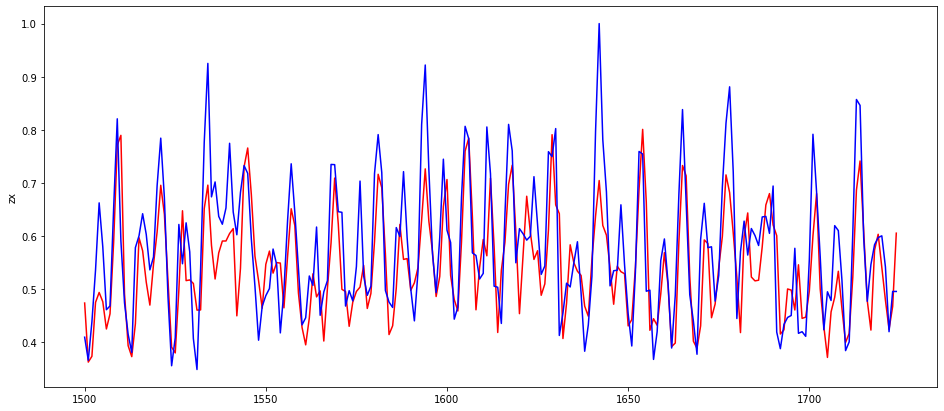

In [22]:
fig = plt.figure(figsize=(16, 7))
plt.plot(y2, predictions, 'r', y2, test_y, 'b')
plt.ylabel("zx")
plt.show()


Time2Vec

In [ ]:
model_instance.train(X_train, y_train)
y_hat = model_instance.model.predict(X_test)

Epoch 1/30
600/600 - 4s - loss: 0.0155 - val_loss: 0.0137 - 4s/epoch - 7ms/step
Epoch 2/30
600/600 - 3s - loss: 0.0113 - val_loss: 0.0107 - 3s/epoch - 5ms/step
Epoch 3/30
600/600 - 3s - loss: 0.0087 - val_loss: 0.0109 - 3s/epoch - 4ms/step
Epoch 4/30
600/600 - 3s - loss: 0.0084 - val_loss: 0.0094 - 3s/epoch - 4ms/step
Epoch 5/30
600/600 - 3s - loss: 0.0080 - val_loss: 0.0089 - 3s/epoch - 4ms/step
Epoch 6/30
600/600 - 3s - loss: 0.0079 - val_loss: 0.0086 - 3s/epoch - 5ms/step
Epoch 7/30
600/600 - 3s - loss: 0.0077 - val_loss: 0.0083 - 3s/epoch - 4ms/step
Epoch 8/30
600/600 - 3s - loss: 0.0075 - val_loss: 0.0083 - 3s/epoch - 4ms/step
Epoch 9/30
600/600 - 3s - loss: 0.0074 - val_loss: 0.0082 - 3s/epoch - 4ms/step
Epoch 10/30
600/600 - 3s - loss: 0.0073 - val_loss: 0.0081 - 3s/epoch - 5ms/step
Epoch 11/30
600/600 - 3s - loss: 0.0072 - val_loss: 0.0080 - 3s/epoch - 4ms/step
Epoch 12/30
600/600 - 3s - loss: 0.0071 - val_loss: 0.0079 - 3s/epoch - 5ms/step
Epoch 13/30
600/600 - 3s - loss: 0.00

In [23]:
class T2V(Layer):
    
    def __init__(self, output_dim=None, **kwargs):
        self.output_dim = output_dim
        super(T2V, self).__init__(**kwargs)
        
    def build(self, input_shape):

        self.W = self.add_weight(name='W',
                                shape=(input_shape[-1], self.output_dim),
                                initializer='uniform',
                                trainable=True)

        self.P = self.add_weight(name='P',
                                shape=(input_shape[1], self.output_dim),
                                initializer='uniform',
                                trainable=True)

        self.w = self.add_weight(name='w',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        self.p = self.add_weight(name='p',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        super(T2V, self).build(input_shape)
        
    def call(self, x):
        
        original = self.w * x + self.p #if i = 0
        sin_trans = K.sin(K.dot(x, self.W) + self.P) # Frequecy and phase shift of sine function, learnable parameters. if 1 <= i <= k
        
        return K.concatenate([sin_trans, original], -1)

In [24]:
class Time2Vec:

    def __init__(self, 
                param={
                    'unit': 32,
                    't2v_dim': 64,
                    'lr': 1e-2, 
                    'act': 'relu', 
                    'epochs': 5,
                    'batch_size': 1024
                }, dim=20):
        self.param = param
        self.dim = dim

    def set_LSTM(self):  
        inp = layers.Input(shape=(self.dim,1))
        x = T2V(self.param['t2v_dim'])(inp)
        x = LSTM(self.param['unit'], activation=self.param['act'])(x)
        x = Dense(1)(x)
        m = Model(inp, x)
        m.compile(loss='mse', optimizer='adam')
        m.summary()
        self.model = m
    
    def train(self, X_train, y_train):

        self.history = self.model.fit(X_train, y_train, epochs=30,batch_size=2, verbose=2, validation_split=0.2, shuffle=False)
    
    def plot_training(self):

        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def evaluate(self, X_test, y_test):

        self.model.evaluate(X_test, y_test)

    def plot_predictions(self, y_test, y_hat, item="HAR Activity"):

        plt.plot(y_test, label=f"Actual {item}", color='green')
        plt.plot(y_hat, label=f"Predicted {item}", color='red')
        
        plt.title(f'{item} prediction')
        plt.xlabel('Time [days]')
        plt.ylabel(f'{item}')
        plt.legend(loc='best')
        plt.show()
    

In [25]:
model_instance = Time2Vec(dim=12)
model_instance.set_LSTM()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 1)]           0         
                                                                 
 t2v (T2V)                   (None, 12, 65)            856       
                                                                 
 lstm_1 (LSTM)               (None, 32)                12544     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,433
Trainable params: 13,433
Non-trainable params: 0
_________________________________________________________________


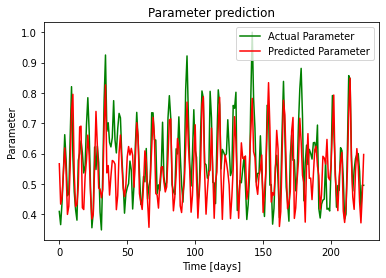

In [ ]:
model_instance.plot_predictions(y_test, y_hat, item= "Parameter")

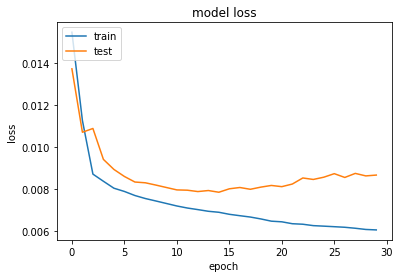

In [ ]:
model_instance.plot_training()

In [ ]:
model_instance.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0095


ARIMA
